In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [10.0, 6.0]

%matplotlib inline

In [4]:
train = pd.read_csv('../../data/titanic/train.csv')
test = pd.read_csv('../../data/titanic/test.csv')
submission = pd.read_csv('../../data/titanic/gender_submission.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train['Pclass'] = train['Pclass'].astype('object')

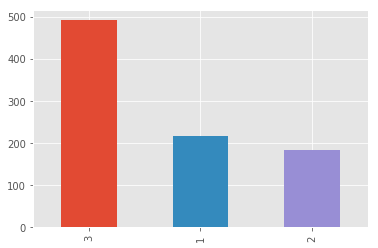

In [10]:
train.Pclass.value_counts().plot.bar()

Text(0.5,1,'Age distribution')

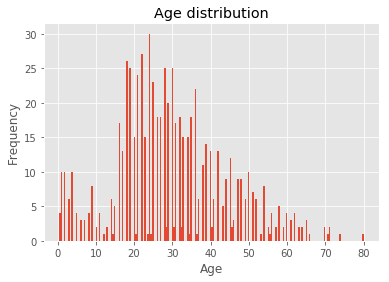

In [11]:
train.Age.plot.hist(bins = 200)
plt.xlabel("Age")
plt.title("Age distribution")

In [12]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
a = train.Age.dropna().unique()
a= np.where(a<=1,1,a)
a

array([22. , 38. , 26. , 35. , 54. ,  2. , 27. , 14. ,  4. , 58. , 20. ,
       39. , 55. , 31. , 34. , 15. , 28. ,  8. , 19. , 40. , 66. , 42. ,
       21. , 18. ,  3. ,  7. , 49. , 29. , 65. , 28.5,  5. , 11. , 45. ,
       17. , 32. , 16. , 25. ,  1. , 30. , 33. , 23. , 24. , 46. , 59. ,
       71. , 37. , 47. , 14.5, 70.5, 32.5, 12. ,  9. , 36.5, 51. , 55.5,
       40.5, 44. ,  1. , 61. , 56. , 50. , 36. , 45.5, 20.5, 62. , 41. ,
       52. , 63. , 23.5,  1. , 43. , 60. , 10. , 64. , 13. , 48. ,  1. ,
       53. , 57. , 80. , 70. , 24.5,  6. ,  1. , 30.5,  1. , 34.5, 74. ])

In [14]:
stats.describe(a)

DescribeResult(nobs=88, minmax=(1.0, 80.0), mean=33.73295454545455, variance=443.35602795193313, skewness=0.1513228814140082, kurtosis=-0.9582144134900159)

In [15]:
np.median(a)

32.75

In [16]:
import seaborn as sns

In [17]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

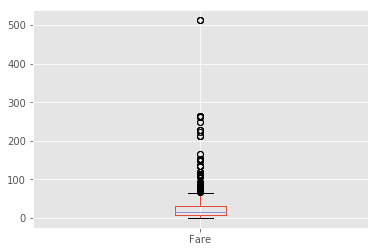

In [19]:
train.Fare.plot.box()

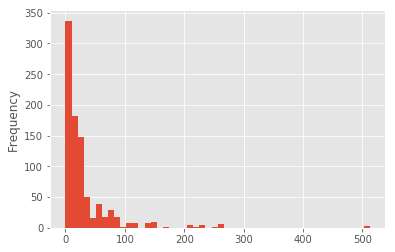

In [20]:
train.Fare.plot.hist(bins=50)

In [21]:
fare_vs_class = train.groupby("Pclass")["Fare"].agg([np.mean,np.median,np.min,np.max,np.std])
fare_vs_class

,mean,median,amin,amax,std
Pclass,,,,,
1,84.154687,60.2875,0.0,512.3292,78.380373
2,20.662183,14.2500,0.0,73.5000,13.417399
3,13.675550,8.0500,0.0,69.5500,11.778142


Text(0,0.5,'Fare')

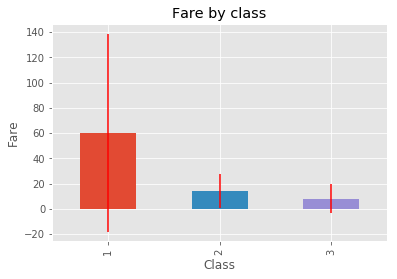

In [22]:
fare_vs_class["median"].plot.bar(yerr = fare_vs_class["std"], ecolor = "red")
plt.title("Fare by class")
plt.xlabel("Class")
plt.ylabel("Fare")

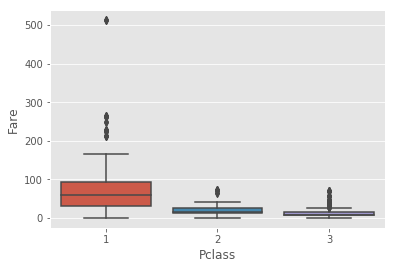

In [23]:
sns.boxplot("Pclass","Fare",data=train)

In [24]:
conditions = [train['Fare'] <= 20 ,(train['Fare'] <= 150),train['Fare'] > 150]
values = ['lo','medium','high']
train['Fclass'] = np.select(conditions,values)

In [25]:
train['Fclass'].value_counts()

lo        515
medium    347
high       29
Name: Fclass, dtype: int64

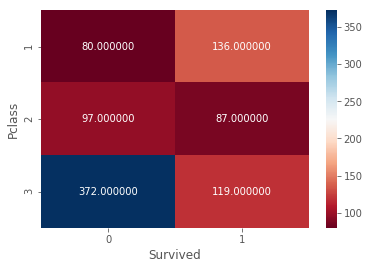

In [26]:
Pclass_vs_survival = train.groupby(["Pclass", "Survived"])["PassengerId"].agg(len).unstack().fillna(0)
sns.heatmap(Pclass_vs_survival, cmap=sns.color_palette("RdBu", 1000), annot=True,fmt='f')

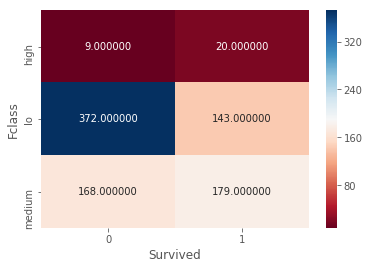

In [27]:
Fclass_vs_survival  = train.groupby(["Fclass","Survived"])["PassengerId"].agg(len).unstack()
sns.heatmap(Fclass_vs_survival,cmap = sns.color_palette("RdBu",1000),annot= True,fmt='f')

In [28]:
aggr = train.dropna().groupby('Sex')['Age'].agg([np.median])
aggr

,median
Sex,
female,32.25
male,37.00


In [29]:
medians = (train[train.Sex == 'female']['Age'].dropna().median(),train[train.Sex == 'male']['Age'].dropna().median())
medians

(27.0, 29.0)

In [30]:
train['Age'].fillna(27.0,inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fclass         891 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


In [32]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [33]:
import re
str1 = "3158 reviews"
print (re.sub('\d+', "str1 ",str1))

str1  reviews


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from mlxtend.plotting import plot_decision_regions

In [36]:
del train["Name"]
del train["PassengerId"]
del train["Cabin"]

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Fclass      891 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [50]:
X = train.iloc[:,1:]
y = train.iloc[:,0]
X.shape,y.shape

((891, 9), (891,))

In [54]:
X = pd.get_dummies(X, drop_first= True)
X.shape

(891, 691)

In [55]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
outcome = pd.DataFrame({"actual": y_test,"pred": y_test_pred}) 
outcome["match"] = outcome.actual == outcome.pred
outcome.sample(10)

,actual,pred,match
437,1,1,True
104,0,0,True
247,1,1,True
386,0,0,True
92,0,0,True
61,1,1,True
3,1,1,True
578,0,1,False
885,0,1,False
800,0,0,True


In [58]:
confusion_matrix(y_true=y_test,y_pred=y_test_pred)

array([[136,  17],
       [ 37,  78]], dtype=int64)

In [59]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [60]:
342/(342+549)

0.3838383838383838

In [61]:
accuracy_score(y_true=y_test,y_pred=y_test_pred)

0.7985074626865671

In [ ]:
plot_decision_regions(X_train,y_train,X_highlight=X_train)